# 1. 주제 선정: 새로운 정부 운영 패러다임인 '정부3.0'의 핵심가치인 개방, 공유, 소통, 협력에 대한 국민들의 반응을 알아본다. 

In [ ]:
#2. 가설 〮 귀무가설: 국민은 개방, 공유, 소통, 협력에 핵심가치로 하는 정부3.0 운영 정책에 대하여 부정적이다. 
#        〮 대립가설: 국민은 개방, 공유, 소통, 협력에 핵심가치로 하는 정부3.0 운영 정책에 대하여 긍정적이다.

In [ ]:
#3. 데이터 수집 〮 신문 기사를 ‘정부3.0’을 키워드로 스크래핑 하여 데이터를 수집한다.
#              〮 신문 기사를 ‘정부3.0 불만’을 키워드로 스크래핑 하여 데이터를 수집한다.

In [ ]:
#4. 행동 계획 〮 개방, 공유, 소통, 협력에 핵심가치로 하는 정부3.0 운영 정책에 대하여 긍정적인 결과를 얻을 경우, 
#                정보공개, 공공데이터 개방, 협업(정보 공유), 맞춤형 서비스 등의 핵심 과제가 
#                업무에 반영될 수 있는 개선 방안에 대하여 논의하고 행정적 운영에 반영할 수 있도록 노력한다.
#                그 반대의 경우는 지금의 행정 운영 방식을 유지하도록 한다.

In [ ]:
### '정부3.0' 을 키워드로 검색하여 단어 추출

In [2]:
import requests

In [3]:
import lxml.html

In [4]:
import csv

In [5]:
url = 'http://news.naver.com/main/search/search.nhn?refresh=&so=rel.dsc&stPhoto=&stPaper=&stRelease=&ie=MS949&detail=0&rcsection=&query=%C1%A4%BA%CE3.0&x=22&y=10&sm=all.basic&pd=1&startDate=&endDate='

In [6]:
with open('news.csv', 'w', encoding='utf8') as f:
    writer = csv.writer(f)
    for i in range(1, 21):
        res = requests.get(url.format(i))  # 기사 목록
        element = lxml.html.fromstring(res.text)
        for news_link in element.xpath('.//a[@class="go_naver"]'):
            try:
                res = requests.get(news_link.attrib['href'])   # 네이버 뉴스 링크
                news = lxml.html.fromstring(res.text)
                body = news.xpath('.//div[@id="articleBodyContents"]')[0]
                writer.writerow([body.text_content()])
            except:
                continue

# 스크래핑된 뉴스 읽어오기

In [7]:
import csv

In [8]:
news = []
with open('news.csv', encoding='utf8', newline='\r\n') as f:
    reader = csv.reader(f)
    for row in reader:
        news.append(row[0])

# 형태소 분석기

In [9]:
from konlpy.tag import Twitter

In [10]:
tagger = Twitter()

# Term-Document Matrix 만들기

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
cv = CountVectorizer(tokenizer=tagger.nouns, max_features=50)

In [13]:
tdf = cv.fit_transform(news)

In [14]:
tdf

<100x50 sparse matrix of type '<class 'numpy.int64'>'
	with 2960 stored elements in Compressed Sparse Row format>

In [15]:
import numpy

In [17]:
numpy.save('mytdm_small.npy',tdf)

In [18]:
tdf = numpy.load('mytdm_small.npy')

In [19]:
tdf = tdf.tolist()

In [20]:
tdf

<80x50 sparse matrix of type '<class 'numpy.int64'>'
	with 2500 stored elements in Compressed Sparse Row format>

# 단어 목록

In [16]:
words = cv.get_feature_names()

In [17]:
words

['가장',
 '각',
 '개',
 '것',
 '계획',
 '규모',
 '기금',
 '기자',
 '기초',
 '기획재정부',
 '내년',
 '년',
 '뉴스',
 '단체',
 '도로',
 '등',
 '보건',
 '복지',
 '부처',
 '분야',
 '비즈',
 '산업',
 '서비스',
 '스마트',
 '액',
 '억원',
 '에너지',
 '예산',
 '예산안',
 '올해',
 '요구',
 '율',
 '이후',
 '일',
 '정부',
 '조',
 '조원',
 '주택',
 '증가',
 '지능',
 '지자체',
 '지출',
 '철도',
 '최근',
 '칠곡군',
 '편성',
 '한국',
 '핵심',
 '협력',
 '홈']

# 한 글자 짜리 단어 빼기

In [18]:
def get_word(doc):
    nouns = tagger.nouns(doc)
    return [noun for noun in nouns if len(noun) > 1]

In [19]:
cv = CountVectorizer(tokenizer=get_word, max_features=50)

In [20]:
tdf = cv.fit_transform(news)

In [24]:
import numpy

In [25]:
numpy.save('tdf0609.npy',tdf)

In [21]:
words = cv.get_feature_names()

In [22]:
words

['가장',
 '거점',
 '계획',
 '고용',
 '교육',
 '규모',
 '기금',
 '기자',
 '기재부',
 '기초',
 '기획재정부',
 '내년',
 '뉴스',
 '단체',
 '도로',
 '보건',
 '복지',
 '부처',
 '분야',
 '비즈',
 '산업',
 '생활',
 '서비스',
 '선정',
 '스마트',
 '억원',
 '에너지',
 '예산',
 '예산안',
 '올해',
 '요구',
 '이후',
 '자치',
 '재정',
 '정부',
 '조원',
 '주택',
 '증가',
 '지능',
 '지방행정',
 '지자체',
 '지출',
 '철도',
 '최근',
 '칠곡군',
 '편성',
 '한국',
 '핵심',
 '행복',
 '협력']

In [23]:
with open('wor.txt', 'w', encoding ='utf8') as f:   ## (A) LDA 입력으로 사용
    f.write('\n'.join(words))

In [24]:
f.close()

In [38]:
#with open('wor.txt', encoding='cp949') as f:  
 #   wor = f.read().splitlines()

In [39]:
#wor

['개방,공무원,공사,공유,과제,교육,국민,기자,김재수,노력,뉴스,뉴시스,달인,대상,대한,더욱,맞춤,문화,본부,사례,사장,생활화,서비스,선정,성과,세상,소통,순회,오늘,우수,위해,전국,전사,전파,정부,중심,중인,지역,직원,추진,추진단,충남도,컨설팅,통해,포토,행정자치부,향상,혁신,협력,협업',
 '']

# 단어별 출현 빈도

In [25]:
import numpy

In [26]:
count_mat = tdf.sum(axis=0)

In [27]:
count_mat

matrix([[140,  80,  80,  80,  80, 140,  80, 100,  80, 100, 100, 220,  80,
          80,  80,  80, 140, 320, 200,  80, 140,  80, 100,  80, 180, 500,
          80, 860,  80, 280, 520,  80,  80,  80, 340, 120, 180, 220,  80,
          60, 120, 180,  80, 100,  80,  80,  80, 100,  80, 100]], dtype=int64)

In [28]:
count = numpy.squeeze(numpy.asarray(count_mat))

In [29]:
count

array([140,  80,  80,  80,  80, 140,  80, 100,  80, 100, 100, 220,  80,
        80,  80,  80, 140, 320, 200,  80, 140,  80, 100,  80, 180, 500,
        80, 860,  80, 280, 520,  80,  80,  80, 340, 120, 180, 220,  80,
        60, 120, 180,  80, 100,  80,  80,  80, 100,  80, 100], dtype=int64)

In [30]:
word_count = list(zip(words, count))

In [31]:
word_count

[('가장', 140),
 ('거점', 80),
 ('계획', 80),
 ('고용', 80),
 ('교육', 80),
 ('규모', 140),
 ('기금', 80),
 ('기자', 100),
 ('기재부', 80),
 ('기초', 100),
 ('기획재정부', 100),
 ('내년', 220),
 ('뉴스', 80),
 ('단체', 80),
 ('도로', 80),
 ('보건', 80),
 ('복지', 140),
 ('부처', 320),
 ('분야', 200),
 ('비즈', 80),
 ('산업', 140),
 ('생활', 80),
 ('서비스', 100),
 ('선정', 80),
 ('스마트', 180),
 ('억원', 500),
 ('에너지', 80),
 ('예산', 860),
 ('예산안', 80),
 ('올해', 280),
 ('요구', 520),
 ('이후', 80),
 ('자치', 80),
 ('재정', 80),
 ('정부', 340),
 ('조원', 120),
 ('주택', 180),
 ('증가', 220),
 ('지능', 80),
 ('지방행정', 60),
 ('지자체', 120),
 ('지출', 180),
 ('철도', 80),
 ('최근', 100),
 ('칠곡군', 80),
 ('편성', 80),
 ('한국', 80),
 ('핵심', 100),
 ('행복', 80),
 ('협력', 100)]

# 빈도 순 정렬

In [32]:
import operator

In [33]:
sorted(word_count, key=operator.itemgetter(1), reverse=True)

[('예산', 860),
 ('요구', 520),
 ('억원', 500),
 ('정부', 340),
 ('부처', 320),
 ('올해', 280),
 ('내년', 220),
 ('증가', 220),
 ('분야', 200),
 ('스마트', 180),
 ('주택', 180),
 ('지출', 180),
 ('가장', 140),
 ('규모', 140),
 ('복지', 140),
 ('산업', 140),
 ('조원', 120),
 ('지자체', 120),
 ('기자', 100),
 ('기초', 100),
 ('기획재정부', 100),
 ('서비스', 100),
 ('최근', 100),
 ('핵심', 100),
 ('협력', 100),
 ('거점', 80),
 ('계획', 80),
 ('고용', 80),
 ('교육', 80),
 ('기금', 80),
 ('기재부', 80),
 ('뉴스', 80),
 ('단체', 80),
 ('도로', 80),
 ('보건', 80),
 ('비즈', 80),
 ('생활', 80),
 ('선정', 80),
 ('에너지', 80),
 ('예산안', 80),
 ('이후', 80),
 ('자치', 80),
 ('재정', 80),
 ('지능', 80),
 ('철도', 80),
 ('칠곡군', 80),
 ('편성', 80),
 ('한국', 80),
 ('행복', 80),
 ('지방행정', 60)]

In [36]:
word_count_sorted = sorted(word_count, key=operator.itemgetter(1), reverse=True)

In [37]:
word_count_sorted[:10]

[('예산', 860),
 ('요구', 520),
 ('억원', 500),
 ('정부', 340),
 ('부처', 320),
 ('올해', 280),
 ('내년', 220),
 ('증가', 220),
 ('분야', 200),
 ('스마트', 180)]

In [ ]:
# 테이블 만들기: 단어별 출현 빈도에 대한 테이블

In [38]:
import pandas

In [42]:
table = pandas.DataFrame(word_count_sorted, columns = ['word','count'])

In [43]:
table

,word,count
0,예산,860
1,요구,520
2,억원,500
3,정부,340
4,부처,320
5,올해,280
6,내년,220
7,증가,220
8,분야,200
9,스마트,180


In [ ]:
# 그래프 그리기: 단어별 출현빈도를 내림차순 정렬한 결과에 대한 그래프 그리기

In [44]:
%matplotlib inline

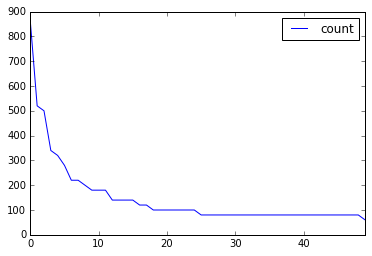

In [46]:
table.plot()

In [ ]:
# seaborn 을 이용한 그래프 그리기: 단어별 출현빈도를 내림차순 정렬한 결과에 대한 그래프 그리기

In [47]:
import seaborn

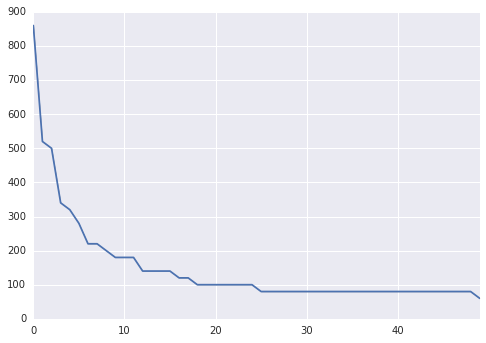

In [48]:
seaborn.tsplot(table['count'], time=table.index)

# 워드 클라우드

In [43]:
%matplotlib inline

In [44]:
from wordcloud import WordCloud

In [45]:
from matplotlib import pyplot

In [46]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)

화면에 표시

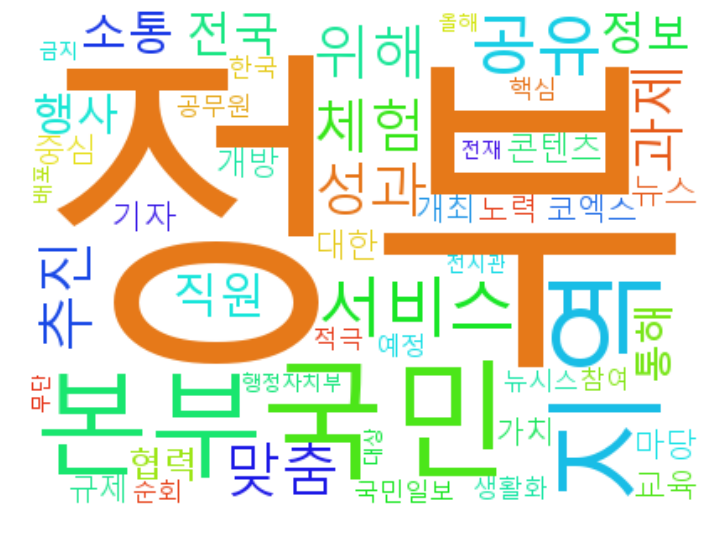

In [47]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

# 단어간 상관계수

In [48]:
word_corr = numpy.corrcoef(tdf.todense(), rowvar=0)

In [49]:
word_corr

array([[ 1.        ,  0.61185237,  0.53881591, ..., -0.19076459,
        -0.43122877,  0.32071891],
       [ 0.61185237,  1.        , -0.05407381, ..., -0.23577978,
        -0.3477593 ,  0.88017162],
       [ 0.53881591, -0.05407381,  1.        , ...,  0.2608746 ,
         0.14291549, -0.16025399],
       ..., 
       [-0.19076459, -0.23577978,  0.2608746 , ...,  1.        ,
         0.83407443,  0.14589509],
       [-0.43122877, -0.3477593 ,  0.14291549, ...,  0.83407443,
         1.        ,  0.07067143],
       [ 0.32071891,  0.88017162, -0.16025399, ...,  0.14589509,
         0.07067143,  1.        ]])

# 상관관계 높은 것 100개만 추리기

In [50]:
edges = []
for i in range(len(words)):
    for j in range(i + 1, len(words)):
        edges.append((words[i], words[j], word_corr[i, j]))

상관계수 높은 순으로 정렬

In [51]:
edges = sorted(edges, key=operator.itemgetter(2), reverse=True)

In [52]:
edges = edges[:50]

In [53]:
edge_list = [(word1, word2) for word1, word2, weight in edges]
weight_list = [weight for word1, word2, weight in edges]

# 상관관계 시각화

In [54]:
import networkx

In [55]:
G = networkx.Graph()

edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight)
    edge_set.add((word1, word2))

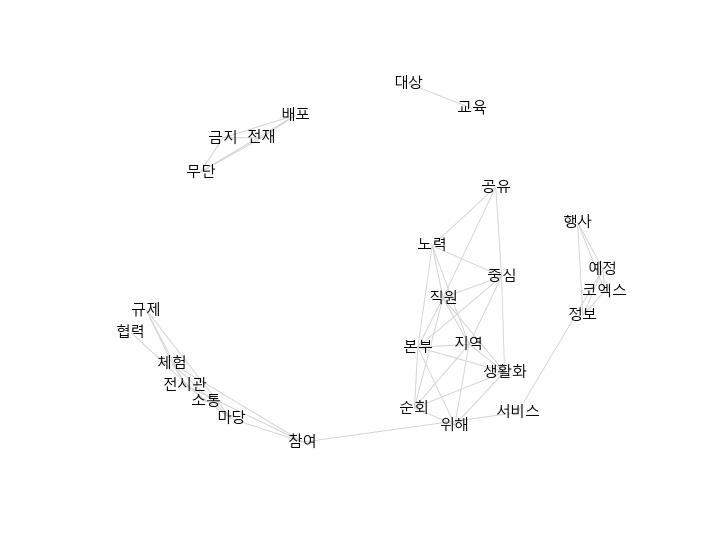

In [58]:
position = networkx.spring_layout(G, iterations=30)
pyplot.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=0)
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='lightgray')
networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic')
#plt.axis('off')
pyplot.axis('off')
pyplot.show()

In [47]:
import csv

In [48]:
from konlpy.tag import Twitter

In [49]:
tagger = Twitter()

In [54]:
f=open('text_result0607.txt', 'w')

In [55]:
with open('text_result0607.txt', 'w') as f:
    w = csv.writer(f)
    w.writerow(words) #csv 파일의 row(한 행)을 적는것

In [56]:
f.close()

In [58]:
with open('text_result0607.txt', encoding='cp949') as f:
    words = f.read().splitlines()

In [59]:
words

['가치,개방,개최,공무원,공유,과제,교육,국민,국민일보,규제,금지,기자,노력,뉴스,뉴시스,대상,대한,마당,맞춤,무단,배포,본부,생활화,서비스,성과,소통,순회,예정,올해,위해,적극,전국,전시관,전재,정보,정부,중심,지역,직원,참여,체험,추진,코엑스,콘텐츠,통해,한국,핵심,행사,행정자치부,협력',
 '']

In [49]:
# '정부3.0' 을 키워드로 검색하여 단어 추출 후 LDA 모델 적용

In [50]:
import numpy

In [51]:
tdm = numpy.load('tdf0609.npy')

In [52]:
tdm = tdm.tolist()

In [53]:
tdm

<80x50 sparse matrix of type '<class 'numpy.int64'>'
	with 2340 stored elements in Compressed Sparse Row format>

In [54]:
with open('wor.txt', encoding='utf8') as f:  #06-09(term) (A) 의 결과를 읽음
    words = f.read().splitlines()

In [55]:
words

['가장',
 '거점',
 '계획',
 '고용',
 '교육',
 '규모',
 '기금',
 '기자',
 '기재부',
 '기초',
 '기획재정부',
 '내년',
 '뉴스',
 '단체',
 '도로',
 '보건',
 '복지',
 '부처',
 '분야',
 '비즈',
 '산업',
 '생활',
 '서비스',
 '선정',
 '스마트',
 '억원',
 '에너지',
 '예산',
 '예산안',
 '올해',
 '요구',
 '이후',
 '자치',
 '재정',
 '정부',
 '조원',
 '주택',
 '증가',
 '지능',
 '지방행정',
 '지자체',
 '지출',
 '철도',
 '최근',
 '칠곡군',
 '편성',
 '한국',
 '핵심',
 '행복',
 '협력']

In [ ]:
#gensim 포맷으로 변환

In [56]:
from gensim.matutils import Sparse2Corpus

In [57]:
corpus = Sparse2Corpus(tdm.T)

In [58]:
corpus

In [ ]:
# LDA 모델 적용

In [59]:
from gensim.models.ldamodel import LdaModel

In [60]:
lda = LdaModel(corpus=corpus, num_topics=100, id2word=dict(enumerate(words)))

In [61]:
# 토픽 보기

In [62]:
lda.show_topic(0)

[('조원', 0.077328988176581653),
 ('복지', 0.063765039443203275),
 ('기획재정부', 0.058421396893700281),
 ('지능', 0.057236066597568955),
 ('분야', 0.054180644701615571),
 ('가장', 0.052697731363119955),
 ('지출', 0.048340160406791968),
 ('기초', 0.045720618369528447),
 ('자치', 0.041766233065088303),
 ('지방행정', 0.032291639917025501)]

In [63]:
# 1. 문서의 토픽 확인 ---- 1.1 문서 변환

In [64]:
doc = [(i, tdm[0, i]) for i in range(50)]

In [65]:
# 문서에서 가장 많이 쓴 단어들 보기

In [66]:
from operator import itemgetter

In [67]:
doc_words = [(words[i], n) for i, n in doc]

In [68]:
sorted(doc_words, key=itemgetter(1), reverse=True)[:10]

[('조원', 9),
 ('지능', 6),
 ('가장', 4),
 ('기획재정부', 4),
 ('분야', 4),
 ('자치', 4),
 ('지출', 4),
 ('기초', 3),
 ('복지', 3),
 ('거점', 2)]

In [69]:
# 문서의 토픽

In [84]:
lda.get_document_topics(doc)

[(2, 0.98714285714284455)]

In [85]:
lda.show_topic(97)

[('자치', 0.02),
 ('이후', 0.02),
 ('조원', 0.02),
 ('정부', 0.02),
 ('재정', 0.02),
 ('증가', 0.02),
 ('예산안', 0.02),
 ('올해', 0.02),
 ('지방행정', 0.02),
 ('요구', 0.02)]

In [86]:
lda.show_topic(81)

[('자치', 0.02),
 ('이후', 0.02),
 ('조원', 0.02),
 ('정부', 0.02),
 ('재정', 0.02),
 ('증가', 0.02),
 ('예산안', 0.02),
 ('올해', 0.02),
 ('지방행정', 0.02),
 ('요구', 0.02)]

In [87]:
# LDA 모델 저장하기

In [88]:
lda.save('20160610.lda')

In [89]:
# LDA 모델 불러오기

In [90]:
lda = LdaModel.load('20160610.lda')

In [83]:
lda.show_topic(0)

[('조원', 0.077328988176581653),
 ('복지', 0.063765039443203275),
 ('기획재정부', 0.058421396893700281),
 ('지능', 0.057236066597568955),
 ('분야', 0.054180644701615571),
 ('가장', 0.052697731363119955),
 ('지출', 0.048340160406791968),
 ('기초', 0.045720618369528447),
 ('자치', 0.041766233065088303),
 ('지방행정', 0.032291639917025501)]

In [4]:
# '정부3.0 불만' 을 키워드로 검색하여 단어 추출

In [5]:
import requests

In [6]:
import lxml.html

In [7]:
import csv

In [8]:
url = 'http://news.naver.com/main/search/search.nhn?refresh=&so=rel.dsc&stPhoto=&stPaper=&stRelease=&ie=MS949&detail=0&rcsection=&query=%C1%A4%BA%CE3.0+%BA%D2%B8%B8&x=0&y=0&sm=all.basic&pd=1&startDate=&endDate='

In [9]:
with open('news_negative.csv', 'w', encoding='utf8') as f:
    writer = csv.writer(f)
    for i in range(1, 21):
        res = requests.get(url.format(i))  # 기사 목록
        element = lxml.html.fromstring(res.text)
        for news_link in element.xpath('.//a[@class="go_naver"]'):
            try:
                res = requests.get(news_link.attrib['href'])   # 네이버 뉴스 링크
                news = lxml.html.fromstring(res.text)
                body = news.xpath('.//div[@id="articleBodyContents"]')[0]
                writer.writerow([body.text_content()])
            except:
                continue

In [ ]:
# 스크래핑된 뉴스 읽어오기

In [10]:
import csv

In [11]:
news2 = []
with open('news_negative.csv', encoding='utf8', newline='\r\n') as f:
    reader = csv.reader(f)
    for row in reader:
        news2.append(row[0])

In [12]:
# 형태소 분석기

In [13]:
from konlpy.tag import Twitter

In [14]:
tagger = Twitter()

In [15]:
# Term-Document Matrix 만들기(CountVectorizer 이용)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
cv2 = CountVectorizer(tokenizer=tagger.nouns, max_features=50)

In [18]:
tdf2 = cv2.fit_transform(news2)

In [19]:
tdf2

<100x50 sparse matrix of type '<class 'numpy.int64'>'
	with 2420 stored elements in Compressed Sparse Row format>

In [20]:
import numpy

In [21]:
numpy.save('mytdm_small2.npy',tdf2)

In [22]:
tdf2 = numpy.load('mytdm_small2.npy')

In [23]:
tdf2 = tdf2.tolist()

In [24]:
tdf2

<100x50 sparse matrix of type '<class 'numpy.int64'>'
	with 2420 stored elements in Compressed Sparse Row format>

In [25]:
# 단어 목록

In [26]:
words2 = cv2.get_feature_names()

In [27]:
words2

['개',
 '것',
 '곳',
 '공공',
 '공무원',
 '공장',
 '관리',
 '그',
 '기반',
 '기술',
 '년',
 '대한',
 '데이터',
 '도',
 '등',
 '디지털',
 '며',
 '문제',
 '박원순',
 '부처',
 '불만',
 '사고',
 '사무',
 '사회',
 '산업혁명',
 '서비스',
 '서울',
 '서울시',
 '수',
 '수학여행',
 '스마트',
 '시장',
 '안전',
 '영상',
 '우리',
 '월',
 '이',
 '일',
 '일정',
 '점검',
 '정부',
 '정치',
 '지역',
 '차',
 '천',
 '청사',
 '파일',
 '한국',
 '혁신',
 '회의']

In [28]:
# 한글자짜리 단어 빼기

In [29]:
def get_word(doc):
    nouns = tagger.nouns(doc)
    return [noun for noun in nouns if len(noun) > 1]

In [30]:
cv2 = CountVectorizer(tokenizer=get_word, max_features=50)

In [31]:
tdf2 = cv2.fit_transform(news2)

In [32]:
import numpy

In [33]:
numpy.save('tdf0609_2.npy',tdf2)

In [34]:
words2 = cv2.get_feature_names()

In [35]:
words2

['가스',
 '계획',
 '공공',
 '공무원',
 '공장',
 '관리',
 '기관',
 '기반',
 '기술',
 '대한',
 '데이터',
 '디지털',
 '문제',
 '미래',
 '박원순',
 '부처',
 '불만',
 '사고',
 '사무',
 '사회',
 '산업',
 '산업혁명',
 '상태',
 '서비스',
 '서울',
 '서울시',
 '세종',
 '수학여행',
 '스마트',
 '시장',
 '안전',
 '영상',
 '우리',
 '이용',
 '일정',
 '전기',
 '점검',
 '정보',
 '정부',
 '정치',
 '제조업',
 '지역',
 '청사',
 '총장',
 '추진',
 '통해',
 '파일',
 '한국',
 '혁신',
 '회의']

In [36]:
with open('wor2.txt', 'w', encoding ='utf8') as f:   ## (A) LDA 입력으로 사용
    f.write('\n'.join(words2))

In [37]:
f.close()

In [38]:
#단어별 출현 빈도

In [39]:
import numpy

In [40]:
count_mat2 = tdf2.sum(axis=0)

In [41]:
count_mat2

matrix([[140, 140, 160, 140, 220, 160, 120, 220, 220, 180, 340, 160, 200,
         120, 220, 160, 180, 140, 140, 160, 140, 160, 120, 280, 220, 160,
         120, 260, 260, 560, 260, 180, 160, 140, 140, 120, 240, 140, 360,
         380, 140, 140, 180, 120, 120, 120, 220, 140, 160, 200]], dtype=int64)

In [42]:
count2 = numpy.squeeze(numpy.asarray(count_mat2))

In [43]:
count2

array([140, 140, 160, 140, 220, 160, 120, 220, 220, 180, 340, 160, 200,
       120, 220, 160, 180, 140, 140, 160, 140, 160, 120, 280, 220, 160,
       120, 260, 260, 560, 260, 180, 160, 140, 140, 120, 240, 140, 360,
       380, 140, 140, 180, 120, 120, 120, 220, 140, 160, 200], dtype=int64)

In [44]:
word_count2 = list(zip(words2, count2))

In [45]:
word_count2

[('가스', 140),
 ('계획', 140),
 ('공공', 160),
 ('공무원', 140),
 ('공장', 220),
 ('관리', 160),
 ('기관', 120),
 ('기반', 220),
 ('기술', 220),
 ('대한', 180),
 ('데이터', 340),
 ('디지털', 160),
 ('문제', 200),
 ('미래', 120),
 ('박원순', 220),
 ('부처', 160),
 ('불만', 180),
 ('사고', 140),
 ('사무', 140),
 ('사회', 160),
 ('산업', 140),
 ('산업혁명', 160),
 ('상태', 120),
 ('서비스', 280),
 ('서울', 220),
 ('서울시', 160),
 ('세종', 120),
 ('수학여행', 260),
 ('스마트', 260),
 ('시장', 560),
 ('안전', 260),
 ('영상', 180),
 ('우리', 160),
 ('이용', 140),
 ('일정', 140),
 ('전기', 120),
 ('점검', 240),
 ('정보', 140),
 ('정부', 360),
 ('정치', 380),
 ('제조업', 140),
 ('지역', 140),
 ('청사', 180),
 ('총장', 120),
 ('추진', 120),
 ('통해', 120),
 ('파일', 220),
 ('한국', 140),
 ('혁신', 160),
 ('회의', 200)]

In [46]:
# 빈도순 정렬

In [47]:
import operator

In [48]:
sorted(word_count2, key=operator.itemgetter(1), reverse=True)

[('시장', 560),
 ('정치', 380),
 ('정부', 360),
 ('데이터', 340),
 ('서비스', 280),
 ('수학여행', 260),
 ('스마트', 260),
 ('안전', 260),
 ('점검', 240),
 ('공장', 220),
 ('기반', 220),
 ('기술', 220),
 ('박원순', 220),
 ('서울', 220),
 ('파일', 220),
 ('문제', 200),
 ('회의', 200),
 ('대한', 180),
 ('불만', 180),
 ('영상', 180),
 ('청사', 180),
 ('공공', 160),
 ('관리', 160),
 ('디지털', 160),
 ('부처', 160),
 ('사회', 160),
 ('산업혁명', 160),
 ('서울시', 160),
 ('우리', 160),
 ('혁신', 160),
 ('가스', 140),
 ('계획', 140),
 ('공무원', 140),
 ('사고', 140),
 ('사무', 140),
 ('산업', 140),
 ('이용', 140),
 ('일정', 140),
 ('정보', 140),
 ('제조업', 140),
 ('지역', 140),
 ('한국', 140),
 ('기관', 120),
 ('미래', 120),
 ('상태', 120),
 ('세종', 120),
 ('전기', 120),
 ('총장', 120),
 ('추진', 120),
 ('통해', 120)]

In [49]:
word_count2_sorted = sorted(word_count2, key=operator.itemgetter(1), reverse=True)

In [50]:
word_count2_sorted[:10]

[('시장', 560),
 ('정치', 380),
 ('정부', 360),
 ('데이터', 340),
 ('서비스', 280),
 ('수학여행', 260),
 ('스마트', 260),
 ('안전', 260),
 ('점검', 240),
 ('공장', 220)]

In [51]:
# 테이블 만들기: 단업별 빈도로 내림차순 정렬 결과에 대한 테이블

In [52]:
import pandas

In [56]:
table2 = pandas.DataFrame(word_count2_sorted, columns = ['negative word','negative count'])

In [57]:
table2

,negative word,negative count
0,시장,560
1,정치,380
2,정부,360
3,데이터,340
4,서비스,280
5,수학여행,260
6,스마트,260
7,안전,260
8,점검,240
9,공장,220


In [58]:
# 그래프 그리기: 단업별 빈도로 내림차순 정렬 결과에 대한 그래프

In [59]:
%matplotlib inline

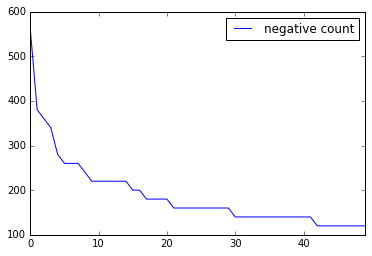

In [60]:
table2.plot()

In [61]:
# seaborn으로그래프 그리기: 단업별 빈도로 내림차순 정렬 결과에 대한 그래프

In [62]:
import seaborn

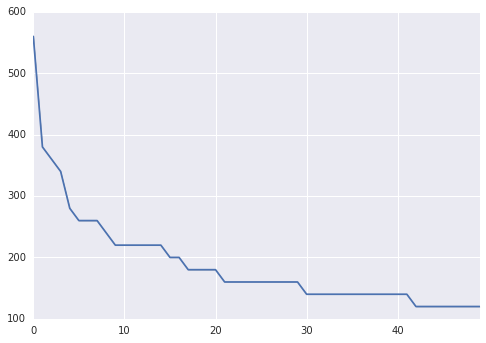

In [64]:
seaborn.tsplot(table2['negative count'], time=table2.index)

In [65]:
# 워드 클라우드

In [66]:
%matplotlib inline

In [67]:
from wordcloud import WordCloud

In [68]:
from matplotlib import pyplot

In [70]:
# 워드 클라우드 만들기

In [71]:
wc2 = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
cloud2 = wc2.generate_from_frequencies(word_count2)

In [72]:
# 화면에 표시

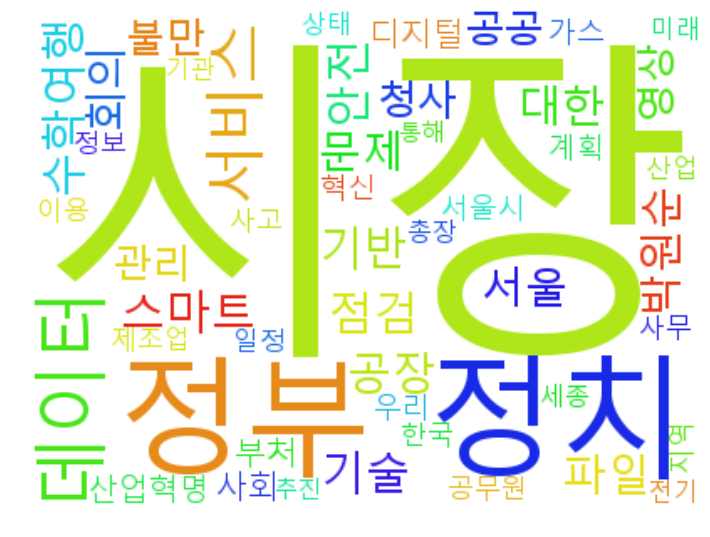

In [73]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud2)
pyplot.axis("off")
pyplot.show()

In [74]:
# 단어간 상관계수

In [75]:
word_corr2 = numpy.corrcoef(tdf2.todense(), rowvar=0)

In [76]:
word_corr2

array([[ 1.        , -0.40147753, -0.25      , ..., -0.10783277,
        -0.29329423, -0.25      ],
       [-0.40147753,  1.        , -0.40147753, ..., -0.6060941 ,
         0.41212866,  0.74560114],
       [-0.25      , -0.40147753,  1.        , ..., -0.10783277,
        -0.29329423, -0.25      ],
       ..., 
       [-0.10783277, -0.6060941 , -0.10783277, ...,  1.        ,
        -0.24510716, -0.37741471],
       [-0.29329423,  0.41212866, -0.29329423, ..., -0.24510716,
         1.        , -0.29329423],
       [-0.25      ,  0.74560114, -0.25      , ..., -0.37741471,
        -0.29329423,  1.        ]])

In [77]:
# 상관관계 높은 것 100개만 추리기

In [78]:
edges2 = []
for i in range(len(words2)):
    for j in range(i + 1, len(words2)):
        edges2.append((words2[i], words2[j], word_corr2[i, j]))

In [79]:
#상관계수 높은 순으로 정렬

In [80]:
edges2 = sorted(edges2, key=operator.itemgetter(2), reverse=True)

In [81]:
edges2 = edges2[:50]

In [82]:
edge_list2 = [(word1, word2) for word1, word2, weight in edges2]
weight_list2 = [weight for word1, word2, weight in edges2]

In [83]:
# 상관관계 시각화

In [84]:
import networkx

In [85]:
G2 = networkx.Graph()

edge_set2 = set()
for word1, word2, weight in edges2:
    G2.add_edge(word1, word2, weight=weight)
    edge_set2.add((word1, word2))

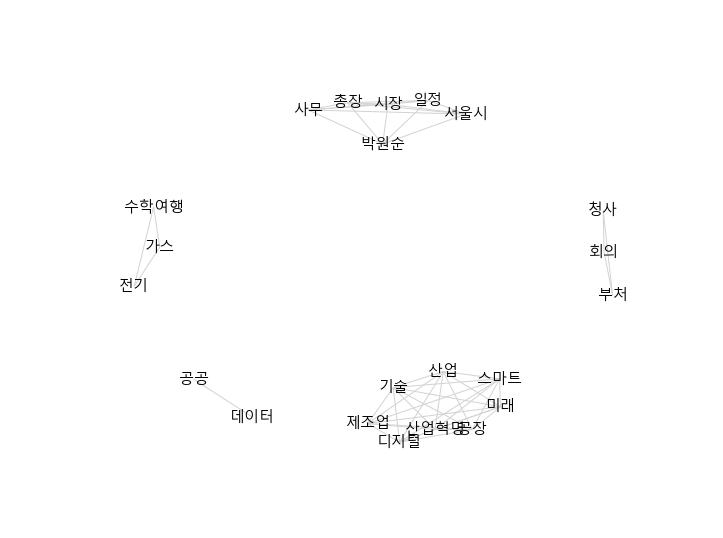

In [86]:
position = networkx.spring_layout(G2, iterations=30)
pyplot.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G2, position, node_size=0)
networkx.draw_networkx_edges(G2, position, edgelist=edge_list2, width=weight_list2, edge_color='lightgray')
networkx.draw_networkx_labels(G2, position, font_size=15, font_family='Malgun Gothic')
pyplot.axis('off')
pyplot.show()

In [88]:
# 텍스트 화일로 저장하기

In [89]:
import csv

In [90]:
from konlpy.tag import Twitter

In [91]:
tagger = Twitter()

In [92]:
with open('text_result0607_2.txt', 'w') as f:
    w = csv.writer(f)
    w.writerow(words2) #csv 파일의 row(한 행)을 적는것

In [93]:
f.close()

In [94]:
with open('text_result0607_2.txt', encoding='cp949') as f:
    words2 = f.read().splitlines()

In [95]:
words2

['가스,계획,공공,공무원,공장,관리,기관,기반,기술,대한,데이터,디지털,문제,미래,박원순,부처,불만,사고,사무,사회,산업,산업혁명,상태,서비스,서울,서울시,세종,수학여행,스마트,시장,안전,영상,우리,이용,일정,전기,점검,정보,정부,정치,제조업,지역,청사,총장,추진,통해,파일,한국,혁신,회의',
 '']

In [96]:
# '정부3.0 불만' 을 키워드로 검색하여 단어 추출 후 LDA 모델 적용

In [97]:
import numpy

In [98]:
tdm2 = numpy.load('tdf0609_2.npy')

In [99]:
tdm2 = tdm2.tolist()

In [100]:
tdm2

<100x50 sparse matrix of type '<class 'numpy.int64'>'
	with 2000 stored elements in Compressed Sparse Row format>

In [101]:
with open('wor2.txt', encoding='utf8') as f:  #06-09(term) (A) 의 결과를 읽음
    words2 = f.read().splitlines()

In [102]:
words2

['가스',
 '계획',
 '공공',
 '공무원',
 '공장',
 '관리',
 '기관',
 '기반',
 '기술',
 '대한',
 '데이터',
 '디지털',
 '문제',
 '미래',
 '박원순',
 '부처',
 '불만',
 '사고',
 '사무',
 '사회',
 '산업',
 '산업혁명',
 '상태',
 '서비스',
 '서울',
 '서울시',
 '세종',
 '수학여행',
 '스마트',
 '시장',
 '안전',
 '영상',
 '우리',
 '이용',
 '일정',
 '전기',
 '점검',
 '정보',
 '정부',
 '정치',
 '제조업',
 '지역',
 '청사',
 '총장',
 '추진',
 '통해',
 '파일',
 '한국',
 '혁신',
 '회의']

In [103]:
# gensim 포맷으로 바꾸기

In [104]:
from gensim.matutils import Sparse2Corpus

In [105]:
corpus2 = Sparse2Corpus(tdm2.T)

In [106]:
corpus2

In [107]:
# LDA 모델을 이용한 문서 만들기

In [108]:
from gensim.models.ldamodel import LdaModel

In [109]:
lda2 = LdaModel(corpus=corpus2, num_topics=100, id2word=dict(enumerate(words2)))

In [110]:
# Topic 보기

In [111]:
lda2.show_topic(0)

[('데이터', 0.23745944600365157),
 ('공공', 0.11177374577864715),
 ('정보', 0.091506330553343757),
 ('정부', 0.07716237839626415),
 ('서비스', 0.074964180762941965),
 ('지역', 0.059530154577535188),
 ('기관', 0.055515358106446075),
 ('불만', 0.054103912295797384),
 ('통해', 0.047535995925236225),
 ('우리', 0.031054333942066643)]

In [112]:
# 문서의 Topic 확인

In [113]:
# 문서 변환

In [114]:
doc2 = [(i, tdm2[0, i]) for i in range(50)]

In [115]:
# 문서에서 가장 많이 쓰인 단어들 보기

In [116]:
from operator import itemgetter

In [117]:
doc_words2 = [(words2[i], n) for i, n in doc2]

In [119]:
sorted(doc_words2, key=itemgetter(1), reverse=True)[:10]

[('데이터', 17),
 ('공공', 8),
 ('정보', 6),
 ('정부', 6),
 ('서비스', 5),
 ('기관', 4),
 ('불만', 4),
 ('지역', 4),
 ('통해', 3),
 ('문제', 2)]

In [120]:
# 문서의 Topic

In [121]:
lda2.get_document_topics(doc2)

[(88, 0.98605633802814852)]

In [122]:
lda2.show_topic(97)

[('우리', 0.02),
 ('영상', 0.02),
 ('전기', 0.02),
 ('일정', 0.02),
 ('이용', 0.02),
 ('정보', 0.02),
 ('스마트', 0.02),
 ('시장', 0.02),
 ('정치', 0.02),
 ('안전', 0.02)]

In [123]:
lda2.show_topic(81)

[('우리', 0.02),
 ('영상', 0.02),
 ('전기', 0.02),
 ('일정', 0.02),
 ('이용', 0.02),
 ('정보', 0.02),
 ('스마트', 0.02),
 ('시장', 0.02),
 ('정치', 0.02),
 ('안전', 0.02)]

In [124]:
# LDA모델 저장하기

In [125]:
lda2.save('20160609_2.lda')

In [126]:
# LDA 모델 불러오기

In [127]:
lda2 = LdaModel.load('20160609_2.lda')

In [128]:
lda2.show_topic(0)

[('데이터', 0.23745944600365157),
 ('공공', 0.11177374577864715),
 ('정보', 0.091506330553343757),
 ('정부', 0.07716237839626415),
 ('서비스', 0.074964180762941965),
 ('지역', 0.059530154577535188),
 ('기관', 0.055515358106446075),
 ('불만', 0.054103912295797384),
 ('통해', 0.047535995925236225),
 ('우리', 0.031054333942066643)]

In [135]:
lda2.show_topic(1)

[('우리', 0.02),
 ('영상', 0.02),
 ('전기', 0.02),
 ('일정', 0.02),
 ('이용', 0.02),
 ('정보', 0.02),
 ('스마트', 0.02),
 ('시장', 0.02),
 ('정치', 0.02),
 ('안전', 0.02)]

In [129]:
# 5. 결과 분석

In [130]:
# 5.1 "정부3.0" 분석

In [131]:
# 단어별 출현빈도 TOP10은 다음과 같음.
# 에산, 요구, 억원, 정부, 부처, 올해, 내년, 증가, 분야, 스마트

In [132]:
# 문서의 토픽을 임의로 선택하여 살펴보면 다음과 같은 토픽이 중복되어 나옴을 알수 있음
# 자치, 이후, 조원, 정부, 재정, 증가, 예산, 올해, 지방행정, 요구

In [134]:
# 단어별 출현빈도 TOP 10과 비교했을때 다음과 같은 단어가 출현빈도와 토픽에 같이 등장함을 알 수 있음.
# 예산, 요구, 정부, 올해, 증가

In [136]:
# 5.2 "정부3.0 불만" 분석

In [137]:
# 단어별 출현빈도 TOP10은 다음과 같음.
# 시장, 정치, 정부, 데이터, 서비스, 수학여행, 스마트, 안전, 점검, 공장

In [138]:
# 문서의 토픽을 임의로 선택하여 살펴보면 다음과 같은 토픽이 중복되어 나옴을 알수 있음
# 우리, 영상, 전기, 일정, 이용, 정보, 스마트, 시장, 정치, 안전 

In [139]:
# 단어별 출현빈도 TOP 10과 비교했을때 다음과 같은 단어가 출현빈도와 토픽에 같이 등장함을 알 수 있음.
# 시장, 정치, 정부, 데이터, 서비스, 스마트, 안전,

In [142]:
# 6. 결 론
# 1) 정부3.0의 핵심 가치(정보공개, 공공데이터개방, 정보공유, 맞춤형서비스)와 관련하여 국민들의 전반적이 이해보다는 
# 정부에서 올해부터 추진되는 부처 사업으로 인식되고 있고 내년부터 예산 증가등의 지원으로 확산이 예측됨
# 2) 아직은 정부3.0 관련 서비스가 대 국민 서비스로 시행되고 있다기 보다는 정부, 공공기관 중심으로 진행되고 있다고 예측할 수 있음.
# 3) 정부3.0 관련 정책은 현재 국민서비스로 보편화되어 있지는 않으며, 홍보가 미흡하지만 앞으로는 진행이 될 것이라는 예측이 가능함. 

In [141]:
####################################################################################################################